In [109]:
import pandas as pd
df = pd.read_csv('df_comp16.csv')

/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [110]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
0,0,W Blaine Luetkemeyer,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-01-28,-2500.0,Republican,Incumbent
1,1,Jason Chaffetz,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-03-02,1000.0,Republican,Incumbent
2,2,Gerry Connolly,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-03-02,2500.0,Democratic,Incumbent
3,3,Kevin W Yoder,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-03-02,2000.0,Republican,Incumbent
4,4,Emanuel Cleaver,House,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1500.0,Democratic,Incumbent


In [111]:
#Reduce to Senate
df = df[df['RecipientCommitteeType'].str.contains('Senate', case=False)]

In [112]:
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
6,6,Orrin Hatch,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1000.0,Republican,NaN
9,9,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-04-07,1000.0,Republican,Incumbent
14,14,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Republican,Incumbent
15,15,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Democratic,NaN
20,20,Ronald Harold Johnson,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-02-12,1000.0,Republican,Incumbent


In [5]:
#Start filtering out by DonorCommitteeNameNormalized environmental groups. Create features (columns) for each, then join to 2018 Spreadsheet
df['DonorCommitteeNameNormalized'].isna().sum()

676852

In [6]:
#Drop rows without value for DonorCommittee
df = df.dropna(subset=['DonorCommitteeNameNormalized'])
df.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
6,6,Orrin Hatch,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1000.0,Republican,NaN
9,9,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-04-07,1000.0,Republican,Incumbent
14,14,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Republican,Incumbent
15,15,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.0,Democratic,NaN
20,20,Ronald Harold Johnson,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-02-12,1000.0,Republican,Incumbent
25,25,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-03-01,500.0,Republican,Incumbent
26,26,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-03-01,5000.0,Republican,Incumbent
31,31,Heidi Heitkamp,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-04-27,2000.0,Democratic,NaN
37,37,Patrick Joseph Toomey,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-05-25,2500.0,Republican,Incumbent
38,38,John Boozman,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-05-25,2000.0,Republican,Incumbent


In [7]:
df_League = df[df['DonorCommitteeNameNormalized'].str.contains('League of Conservation', case=False)]
df_League.head()

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
64827,64827,Patrick Leahy,Senate,"Amory, Daniel",Retired,LEAGUE OF CONSERVATION VOTERS ACTION FUND,4,Individual,Retired,2016-06-26,312.0,Democratic,Incumbent
66154,66154,Patrick Leahy,Senate,"Berlekamp, Jennifer",Retired,LEAGUE OF CONSERVATION VOTERS ACTION FUND,4,Individual,Retired,2016-11-01,500.0,Democratic,Incumbent
149725,149725,Harry Reid,Senate,"Meadows, William H",Not Available,LEAGUE OF CONSERVATION VOTERS ACTION FUND,4,Individual,Retired,2015-01-18,1000.0,Democratic,Incumbent
204914,204914,Brian Emanuel Schatz,Senate,LEAGUE OF CONSERVATION VOTERS ACTION FUND,League of Conservation Voters,LEAGUE OF CONSERVATION VOTERS ACTION FUND,0,NaN,NaN,2015-03-11,2500.0,Democratic,Incumbent
204927,204927,Richard Blumenthal,Senate,LEAGUE OF CONSERVATION VOTERS ACTION FUND,League of Conservation Voters,LEAGUE OF CONSERVATION VOTERS ACTION FUND,0,NaN,NaN,2015-02-20,1000.0,Democratic,Incumbent


In [27]:
df_League['TransactionAmount'].sum()
#About 70% of all Congressional donations

2736208.0

In [13]:
# get dataframe linking name to total donations by the league of conservation
namegroups = df_League.groupby('RecipientCandidateNameNormalized')
df_League_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [37]:
# rename column
df_League_Senate = df_League_Senate.rename(index=str, columns={"TransactionAmount": "LeagueOfConservation16"})
df_League_Senate

,LeagueOfConservation16
RecipientCandidateNameNormalized,
Tom Udall,1000.0
Timothy Michael Kaine,11800.0
Ted Strickland,137887.0
Sheldon Whitehouse,19250.0
Russell Feingold,359242.0
Ron Wyden,77311.0
Richard Blumenthal,22746.0
Patty Murray,59369.0
Patrick Murphy,31589.0


In [25]:
df_League_Senate['LeagueOfConservation16'].sum()

2736208.0

In [31]:
df_League_Senate.shape

(30, 1)

In [123]:
df_senate = pd.read_excel('pols_list_senate.xlsx')
df_senate.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Dan Sullivan,Republican,NaN,7
1,Senate,AK,Lisa Murkowski,Republican,NaN,14
2,Senate,AL,Doug Jones,Democratic,NaN,79
3,Senate,AL,Richard Shelby,Republican,NaN,7
4,Senate,AR,John Boozman,Republican,NaN,7


In [29]:
# check if senators appear more than once
(df_senate.RecipientCandidateNameNormalized.value_counts()>1).any()

False

In [39]:
result = pd.merge(df_senate, df_League_Senate, how='left', on='RecipientCandidateNameNormalized')
result['LeagueOfConservation16']=result['LeagueOfConservation16'].fillna(0)
result.tail(51)

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16
50,Senate,MS,Thad Cochran,Republican,NaN,0,0.0
51,Senate,MT,Jon Tester,Democratic,NaN,93,1000.0
52,Senate,MT,Steven Daines,Republican,NaN,14,0.0
53,Senate,NC,Richard Burr,Republican,NaN,14,0.0
54,Senate,NC,Thom R Tillis,Republican,NaN,7,0.0
55,Senate,ND,Heidi Heitkamp,Democratic,Incumbent,50,0.0
56,Senate,ND,John Hoeven,Republican,NaN,7,0.0
57,Senate,NE,Benjamin E Sasse,Republican,NaN,14,0.0
58,Senate,NE,Debra S Fischer,Republican,Incumbent,7,0.0
59,Senate,NH,Jeanne Shaheen,Democratic,NaN,93,500.0


In [33]:
result['LeagueOfConservation16'].sum()
#Less than half of the League of Conservation Voters' Senate donations in the 2016 cycle went towards successful candidates
#Notable losers were Russ Feingold and Kathleen Alana Mcginty

1290371.0

In [36]:
result['LeagueOfConservation16'].where(result['LeagueOfConservation16'] > 0).count()
#But 20 of the 30 candidates they donated to won

20

In [44]:
df_ActBlue = df[df['DonorCommitteeNameNormalized'].str.contains('ACTBLUE', case=False)]
df_ActBlue

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
63044,63044,Patrick Leahy,Senate,"Jones, Robert",Alston & Bird,ACTBLUE,4,Individual,Attorney,2015-03-27,1000.0,Democratic,Incumbent
63063,63063,Patrick Leahy,Senate,"Carroll, Edward J",Self-Employed,ACTBLUE,4,Individual,Attorney,2015-03-31,1000.0,Democratic,Incumbent
63064,63064,Patrick Leahy,Senate,"Tanielian, Matthew",Franklin Square Group,ACTBLUE,4,Individual,Consultant,2015-03-29,2700.0,Democratic,Incumbent
63065,63065,Patrick Leahy,Senate,"Turner, Reginald",Clark Hill PLC,ACTBLUE,4,Individual,Legal And Paralegal,2015-03-30,500.0,Democratic,Incumbent
63067,63067,Patrick Leahy,Senate,"Berger, Justin","Cotchett, Pitre & McCarthy",ACTBLUE,4,Individual,Attorney,2015-03-27,1000.0,Democratic,Incumbent
63068,63068,Patrick Leahy,Senate,"Vickers, George",None,ACTBLUE,4,Individual,Education And Training,2015-03-29,250.0,Democratic,Incumbent
63071,63071,Patrick Leahy,Senate,"Bell, Ron",Yahoo!,ACTBLUE,4,Individual,General Counsel,2015-02-19,2700.0,Democratic,Incumbent
63077,63077,Patrick Leahy,Senate,"Kaplan, Helene And Mark","Skadden, Arps, Slate, Meagher & Flom",ACTBLUE,4,Individual,Lawyer,2015-03-30,500.0,Democratic,Incumbent
63082,63082,Patrick Leahy,Senate,"Johnson, Thomas S",Self-Employed,ACTBLUE,4,Individual,Self-employed,2015-03-31,1000.0,Democratic,Incumbent
63083,63083,Patrick Leahy,Senate,"Horan, Francis And Bessie",None,ACTBLUE,4,Individual,None,2015-03-30,250.0,Democratic,Incumbent


In [43]:
df_ActBlue['TransactionAmount'].sum()
#ACTBLUE donated about 45% of Congressional totals in 2016 cycle to Senate. About 25% of count

89107119.0

In [45]:
# get dataframe linking name to total donations by the ACTBLUE
namegroups = df_ActBlue.groupby('RecipientCandidateNameNormalized')
df_ActBlue_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [46]:
# rename column
df_ActBlue_Senate = df_ActBlue_Senate.rename(index=str, columns={"TransactionAmount": "ACTBLUE16"})
df_ActBlue_Senate

,ACTBLUE16
RecipientCandidateNameNormalized,
Tom Udall,127456.0
Timothy Michael Kaine,1075639.0
Thomas Carper,2500.0
Thomas Alan Dixon,1000.0
Ted Strickland,2342156.0
Tammy Baldwin,238156.0
Stewart Albertson,6250.0
Sherrod Brown,388088.0
Sheldon Whitehouse,252888.0


In [47]:
df_ActBlue_Senate['ACTBLUE16'].sum()

89107119.0

In [51]:
result2 = pd.merge(result, df_ActBlue_Senate, how='left', on='RecipientCandidateNameNormalized')
result2['ACTBLUE16']=result2['ACTBLUE16'].fillna(0)
result2

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,67550.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,5453363.0


In [52]:
result2['ACTBLUE16'].sum()
#A little over half of ACTBLUE's Senate donations in the 2016 cycle went towards successful candidates

46608867.0

In [53]:
result2['ACTBLUE16'].where(result2['ACTBLUE16'] > 0).count()
#49 of the 86 candidates they donated to won/ remained in Senate

49

In [56]:
df_ClubGrowth = df[df['DonorCommitteeNameNormalized'].str.contains('CLUB FOR GROWTH PAC', case=False)]
df_ClubGrowth

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
184692,184692,Charles Grassley,Senate,"Weidig, Larry",Retired,CLUB FOR GROWTH PAC,4,Individual,Retired,2016-10-19,50.0,Republican,Incumbent
276766,276766,Roy Blunt,Senate,"Hillman, Tatnall",Retired,CLUB FOR GROWTH PAC,4,Individual,N/a,2016-11-03,2700.0,Republican,Incumbent
276767,276767,Roy Blunt,Senate,"Mcnece, Greg",davisville properties,CLUB FOR GROWTH PAC,4,Individual,Ceo,2016-11-03,750.0,Republican,Incumbent
276800,276800,Roy Blunt,Senate,"Campanaro, Robert",Not Available,CLUB FOR GROWTH PAC,4,Individual,Retired,2016-10-31,2700.0,Republican,Incumbent
276801,276801,Roy Blunt,Senate,"Whelan, Stephen",Blank Rome LLP,CLUB FOR GROWTH PAC,4,Individual,Attorney,2016-10-31,500.0,Republican,Incumbent
276817,276817,Roy Blunt,Senate,"Mcnece, Greg",davisville properties,CLUB FOR GROWTH PAC,4,Individual,Ceo,2016-10-31,1500.0,Republican,Incumbent
276818,276818,Roy Blunt,Senate,"Mcquaid, Charles",Retired,CLUB FOR GROWTH PAC,4,Individual,N/a,2016-10-31,500.0,Republican,Incumbent
276880,276880,Roy Blunt,Senate,"Jackson, Elizabeth",Not Available,CLUB FOR GROWTH PAC,4,Individual,Retired,2016-11-03,100.0,Republican,Incumbent
276881,276881,Roy Blunt,Senate,"Dupont, Joan",Retired,CLUB FOR GROWTH PAC,4,Individual,N/a,2016-10-28,500.0,Republican,Incumbent
276882,276882,Roy Blunt,Senate,"Grace, Oliver",Developmen Services Llc,CLUB FOR GROWTH PAC,4,Individual,Member,2016-10-25,2700.0,Republican,Incumbent


In [57]:
df_ClubGrowth['TransactionAmount'].sum()
#CLUB FOR GROWTH donated about 70% of Congressional totals in 2016 cycle to Senate. About 70% of count

2296487.0

In [58]:
# get dataframe linking name to total donations by the CLUB FOR GROWTH
namegroups = df_ClubGrowth.groupby('RecipientCandidateNameNormalized')
df_ClubGrowth_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [61]:
# rename column
df_ClubGrowth_Senate = df_ClubGrowth_Senate.rename(index=str, columns={"TransactionAmount": "ClubGrowth16"})
df_ClubGrowth_Senate

,ClubGrowth16
RecipientCandidateNameNormalized,
Todd Christopher Young,28215.0
Timothy Scott,37425.0
Roy Blunt,14925.0
Ronald Harold Johnson,525033.0
Rob Portman,1000.0
Richard Burr,1250.0
Rand Paul,67630.0
Rafael Edward Ted Cruz,1950.0
Patrick Joseph Toomey,400316.0


In [63]:
result3 = pd.merge(result2, df_ClubGrowth_Senate, how='left', on='RecipientCandidateNameNormalized')
result3['ClubGrowth16']=result3['ClubGrowth16'].fillna(0)
result3

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,0.0,10800.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,67550.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,5453363.0,0.0


In [64]:
result3['ClubGrowth16'].sum()
#About 75% of CLUB FOR GROWTH's Senate donations in the 2016 cycle went towards successful candidates

1727356.0

In [65]:
result3['ClubGrowth16'].where(result3['ClubGrowth16'] > 0).count()
#13 of the 21 candidates they donated to won/ remained in Senate

13

In [74]:
df_SenCons = df[df['DonorCommitteeNameNormalized'].str.contains('Senate Conservatives Fund', case=False)]
df_SenCons

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
642504,642504,Mike Lee,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2015-06-23,5000.0,Republican,Incumbent
642505,642505,Marlin A Stutzman,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2015-12-31,5000.0,Republican,Open Seat
642512,642512,Darryl Glenn,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2016-05-31,5000.0,Republican,Challenger
642514,642514,Marlin A Stutzman,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2016-06-03,-5000.0,Republican,Open Seat
642515,642515,Darryl Glenn,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2016-06-29,5000.0,Republican,Challenger
642521,642521,John C Fleming Jr,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2016-11-02,5000.0,Republican,Open Seat
642522,642522,Josh Mandel,Senate,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,SENATE CONSERVATIVES FUND,0,NaN,NaN,2016-12-13,5000.0,Republican,NaN
951178,951178,Mike Lee,Senate,"Christians, Mark",Occidental Petroleum,SENATE CONSERVATIVES FUND,4,Individual,Category Manager,2015-06-30,250.0,Republican,Incumbent
951179,951179,Mike Lee,Senate,"Rogers, Norman",Retired,SENATE CONSERVATIVES FUND,4,Individual,Retired,2015-07-13,250.0,Republican,Incumbent
951185,951185,Mike Lee,Senate,"Griffith, Richard Mr",Self-Employed,SENATE CONSERVATIVES FUND,4,Individual,Investor,2015-09-29,250.0,Republican,Incumbent


In [75]:
df_SenCons['TransactionAmount'].sum()
#CLUB FOR GROWTH donated over 80% of Congressional totals in 2016 cycle to Senate. Over 80% of count too

1312597.0

In [76]:
# get dataframe linking name to total donations by the SENATE CONSERVATIVES
namegroups = df_SenCons.groupby('RecipientCandidateNameNormalized')
df_SenCons_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [77]:
# rename column
df_SenCons_Senate = df_SenCons_Senate.rename(index=str, columns={"TransactionAmount": "SenCons16"})
df_SenCons_Senate

,SenCons16
RecipientCandidateNameNormalized,
Mike Lee,149122.0
Marlin A Stutzman,193058.0
Josh Mandel,59350.0
John C Fleming Jr,5000.0
Darryl Glenn,906067.0


In [78]:
result4 = pd.merge(result3, df_SenCons_Senate, how='left', on='RecipientCandidateNameNormalized')
result4['SenCons16']=result4['SenCons16'].fillna(0)
result4

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0.0,0.0,0.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,0.0,0.0,0.0,0.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,0.0,10800.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,67550.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,5453363.0,0.0,0.0


In [79]:
result4['SenCons16'].sum()
#Only about 15% of SENATE CONSERVATIVES' Senate donations in the 2016 cycle went towards successful candidates

149122.0

In [80]:
result4['SenCons16'].where(result4['SenCons16'] > 0).count()
#1 of the 5 candidates they donated to won/ remained in Senate

1

In [82]:
df_Koch = df[df['DonorCommitteeNameNormalized'].str.contains('Koch Industries', case=False)]
df_Koch

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
192763,192763,John Isakson,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-02-19,5000.0,Republican,Incumbent
192766,192766,Patrick Joseph Toomey,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-01-27,500.0,Republican,Incumbent
192767,192767,Patrick Joseph Toomey,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-01-27,500.0,Republican,Incumbent
192790,192790,Richard Shelby,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-04-23,2500.0,Republican,Incumbent
192799,192799,Jerry Moran,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-03,1500.0,Republican,Incumbent
192831,192831,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-03,1000.0,Republican,Incumbent
192832,192832,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-18,4000.0,Republican,Incumbent
192833,192833,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-18,1000.0,Republican,Incumbent
192834,192834,Rand Paul,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-25,5000.0,Republican,Incumbent
192835,192835,Rand Paul,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-25,5000.0,Republican,Incumbent


In [83]:
df_Koch['TransactionAmount'].sum()
#Koch Industries donated only about 15% of Congressional totals in 2016 cycle to Senate. Only ~15% of count too

201000.0

In [84]:
# get dataframe linking name to total donations by Koch Industries
namegroups = df_Koch.groupby('RecipientCandidateNameNormalized')
df_Koch_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [85]:
# rename column
df_Koch_Senate = df_Koch_Senate.rename(index=str, columns={"TransactionAmount": "Koch16"})
df_Koch_Senate

,Koch16
RecipientCandidateNameNormalized,
Todd Christopher Young,10000.0
Timothy Scott,10000.0
Roy Blunt,10000.0
Ronald Harold Johnson,9000.0
Rob Portman,10000.0
Richard Shelby,10000.0
Richard Burr,10000.0
Rand Paul,10000.0
Patrick Joseph Toomey,5500.0


In [87]:
result5 = pd.merge(result4, df_Koch_Senate, how='left', on='RecipientCandidateNameNormalized')
result5['Koch16']=result5['Koch16'].fillna(0)
result5

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16,Koch16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0.0,0.0,0.0,0.0,0.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0.0,0.0,0.0,0.0,10000.0
4,Senate,AR,John Boozman,Republican,NaN,7,0.0,0.0,0.0,0.0,10000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,0.0,10800.0,0.0,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,0.0,0.0,0.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,67550.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,5453363.0,0.0,0.0,0.0


In [88]:
result5['Koch16'].sum()
#About 85% of Koch Industries' Senate donations in the 2016 cycle went towards successful candidates

177500.0

In [90]:
result5['Koch16'].where(result5['Koch16'] > 0).count()
#19 of the 24 candidates they donated to won/ remained in Senate

19

In [100]:
df_Exxon = df[df['DonorCommitteeNameNormalized'].str.contains('Exxon Mobil', case=False)]
df_Exxon

,Unnamed: 0,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
104238,104238,Michael F Bennet,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-28,1000.0,Democratic,Incumbent
104243,104243,John Thune,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-16,3000.0,Republican,Incumbent
104244,104244,Kelly A Ayotte,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-16,2500.0,Republican,Incumbent
104245,104245,Mike Lee,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-28,1000.0,Republican,Incumbent
104246,104246,Patrick Joseph Toomey,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-16,2500.0,Republican,Incumbent
104247,104247,Roy Blunt,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-16,2500.0,Republican,Incumbent
104259,104259,Richard Burr,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-01-16,2000.0,Republican,Incumbent
104268,104268,Kelly A Ayotte,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-02-12,1000.0,Republican,Incumbent
104275,104275,Mitch Mcconnell,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-02-18,2500.0,Republican,NaN
104280,104280,Ronald Harold Johnson,Senate,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,NaN,NaN,2015-02-18,1000.0,Republican,Incumbent


In [101]:
df_Exxon['TransactionAmount'].sum()
#Exxon Mobil donated only about 15% of Congressional totals in 2016 cycle to Senate. Only ~15% of count too

298500.0

In [102]:
# get dataframe linking name to total donations by Exxon Mobil
namegroups = df_Exxon.groupby('RecipientCandidateNameNormalized')
df_Exxon_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [107]:
# rename column
df_Exxon_Senate = df_Exxon_Senate.rename(index=str, columns={"TransactionAmount": "Exxon16"})
df_Exxon_Senate.shape

(38, 1)

In [104]:
result6 = pd.merge(result5, df_Exxon_Senate, how='left', on='RecipientCandidateNameNormalized')
result6['Exxon16']=result6['Exxon16'].fillna(0)
result6

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16,Koch16,Exxon16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0.0,0.0,0.0,0.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0.0,0.0,0.0,0.0,0.0,8000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0,0.0,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0.0,0.0,0.0,0.0,10000.0,10000.0
4,Senate,AR,John Boozman,Republican,NaN,7,0.0,0.0,0.0,0.0,10000.0,10000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,0.0,10800.0,0.0,0.0,5000.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,0.0,0.0,0.0,0.0,10000.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,67550.0,0.0,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,5453363.0,0.0,0.0,0.0,0.0


In [105]:
result6['Exxon16'].sum()
#About 85% of Exxon Mobil's Senate donations in the 2016 cycle went towards successful candidates (winning/ remaining)

262000.0

In [106]:
result6['Exxon16'].where(result6['Exxon16'] > 0).count()
#32 of the 38 candidates they donated to won/ remained in Senate

32

In [108]:
result6.to_excel('senate_env.xlsx')

In [113]:
#Start filtering out by DonorCommitteeNameNormalized environmental groups. Create features (columns) for each, then join to 2018 Spreadsheet
df['DonorOrganization'].isna().sum()

83

In [116]:
#Drop rows without value for DonorOrganization
df = df.dropna(subset=['DonorOrganization'])
df = df.drop(['Unnamed: 0'], axis=1)
df

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
6,Orrin Hatch,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-05-15,1000.00,Republican,NaN
9,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-04-07,1000.00,Republican,Incumbent
14,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.00,Republican,Incumbent
15,Tammy Baldwin,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2015-11-30,1000.00,Democratic,NaN
20,Ronald Harold Johnson,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-02-12,1000.00,Republican,Incumbent
25,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-03-01,500.00,Republican,Incumbent
26,Roy Blunt,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-03-01,5000.00,Republican,Incumbent
31,Heidi Heitkamp,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-04-27,2000.00,Democratic,NaN
37,Patrick Joseph Toomey,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-05-25,2500.00,Republican,Incumbent
38,John Boozman,Senate,HALLMARK CARDS PAC,Hallmark Cards,HALLMARK CARDS PAC,0,NaN,NaN,2016-05-25,2000.00,Republican,Incumbent


In [118]:
df_Koch = df[df['DonorOrganization'].str.contains('Koch Industries', case=False)]
df_Koch

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
192763,John Isakson,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-02-19,5000.0,Republican,Incumbent
192766,Patrick Joseph Toomey,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-01-27,500.0,Republican,Incumbent
192767,Patrick Joseph Toomey,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-01-27,500.0,Republican,Incumbent
192790,Richard Shelby,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-04-23,2500.0,Republican,Incumbent
192799,Jerry Moran,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-03,1500.0,Republican,Incumbent
192831,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-03,1000.0,Republican,Incumbent
192832,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-18,4000.0,Republican,Incumbent
192833,Rob Portman,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-18,1000.0,Republican,Incumbent
192834,Rand Paul,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-25,5000.0,Republican,Incumbent
192835,Rand Paul,Senate,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,Koch Industries,KOCH INDUSTRIES INC POLITICAL ACTION COMMITTEE...,0,NaN,NaN,2015-03-25,5000.0,Republican,Incumbent


In [119]:
df_Koch['TransactionAmount'].sum()
#Koch Industries donated only about 15% of Congressional totals in 2016 cycle to Senate. Only ~15% of count too. 
#Note "DonorOrganization" catches a few more Koch Industries donations that come from execs rather than PAC

315700.0

In [120]:
# get dataframe linking name to total donations by KOCH INDUSTRIES "Org"
namegroups = df_Koch.groupby('RecipientCandidateNameNormalized')
df_Koch_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [122]:
# rename column
df_Koch_Senate = df_Koch_Senate.rename(index=str, columns={"TransactionAmount": "Koch16"})
df_Koch_Senate

,Koch16
RecipientCandidateNameNormalized,
Todd Christopher Young,10500.0
Timothy Scott,18100.0
Roy Blunt,29900.0
Ronald Harold Johnson,22500.0
Rob Portman,12900.0
Richard Shelby,10000.0
Richard Burr,10000.0
Rand Paul,10000.0
Patrick Joseph Toomey,13600.0


In [124]:
comp1 = pd.merge(df_senate, df_Koch_Senate, how='left', on='RecipientCandidateNameNormalized')
comp1['Koch16']=comp1['Koch16'].fillna(0)
comp1

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,Koch16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,500.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,1500.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,10000.0
4,Senate,AR,John Boozman,Republican,NaN,7,10000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0


In [125]:
comp1['Koch16'].sum()
#About 85% of Koch Industries' Senate donations in the 2016 cycle went towards successful candidates

272300.0

In [126]:
comp1['Koch16'].where(comp1['Koch16'] > 0).count()
#21 of the 29 candidates they donated to won/ remained in Senate

21

In [133]:
df_Exxon = df[df['DonorOrganization'].str.contains('exxon', case=False)]
df_Exxon[120:180]

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
190248,Charles Grassley,Senate,"Beresford, Matthew",ExxonMobil,NaN,4,Individual,Geoscientist,2016-09-22,416.0,Republican,Incumbent
190328,Charles Grassley,Senate,Exxon Mobil Corporation Pac,ExxonMobil,EXXON MOBIL CORPORATION POLITICAL ACTION COMMI...,0,Unknown,NaN,2016-05-19,500.0,Republican,Incumbent
275815,Roy Blunt,Senate,"Tillerson, Rex",ExxonMobil,NaN,4,Individual,Executive,2016-08-31,5400.0,Republican,Incumbent
275816,Roy Blunt,Senate,"Tillerson, Rex",ExxonMobil,NaN,4,Individual,Executive,2016-08-31,-2700.0,Republican,Incumbent
276602,Roy Blunt,Senate,"Mifflin, Richard",ExxonMobil,NaN,4,Individual,Research,2016-10-21,2700.0,Republican,Incumbent
277530,Roy Blunt,Senate,"Beresford, Matthew",ExxonMobil,NaN,4,Individual,Geoscientist,2016-09-22,416.0,Republican,Incumbent
450895,Lisa Murkowski,Senate,"Neidig, Hans",ExxonMobil,NaN,4,Individual,Executive,2016-03-11,1000.0,Republican,Incumbent
451752,Lisa Murkowski,Senate,"Tillerson, Rex W",ExxonMobil,NaN,4,Individual,Ceo,2015-08-25,2700.0,Republican,Incumbent
451753,Lisa Murkowski,Senate,"Tillerson, Rex W",ExxonMobil,NaN,4,Individual,Ceo,2015-08-25,2700.0,Republican,Incumbent
451756,Lisa Murkowski,Senate,"Williams, Jack P Jr",ExxonMobil,NaN,4,Individual,Sr. Vice President,2015-09-11,1350.0,Republican,Incumbent


In [134]:
df_Exxon['TransactionAmount'].sum()
#Exxon Mobil donated only about 20% of Congressional totals in 2016 cycle to Senate. Only ~12% of count too. 
#Note "DonorOrganization" catches a few more Exxon donations that come from Exxon staff

375100.0

In [135]:
df_Exxon.shape

(243, 12)

In [136]:
# get dataframe linking name to total donations by Exxon Mobil "Org"
namegroups = df_Exxon.groupby('RecipientCandidateNameNormalized')
df_Exxon_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [137]:
# rename column
df_Exxon_Senate = df_Exxon_Senate.rename(index=str, columns={"TransactionAmount": "Exxon16"})
df_Exxon_Senate

,Exxon16
RecipientCandidateNameNormalized,
William Cassidy,2500.0
Todd Christopher Young,14900.0
Timothy Scott,10000.0
Russell Feingold,107.0
Roy Blunt,15816.0
Ronald Harold Johnson,18070.0
Rob Portman,5666.0
Richard Shelby,15000.0
Richard Burr,10416.0


In [138]:
comp2 = pd.merge(comp1, df_Exxon_Senate, how='left', on='RecipientCandidateNameNormalized')
comp2['Exxon16']=comp2['Exxon16'].fillna(0)
comp2

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,Koch16,Exxon16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,500.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,1500.0,16000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,10000.0,15000.0
4,Senate,AR,John Boozman,Republican,NaN,7,10000.0,10500.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,5000.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,10000.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,3700.0


In [139]:
comp2['Exxon16'].sum()
#About 80% of Exxon Mobils' Senate donations in the 2016 cycle went towards successful candidates

315022.0

In [140]:
comp2['Exxon16'].where(comp2['Exxon16'] > 0).count()
#38 of the 50 candidates they donated to won/ remained in Senate

38

In [162]:
df_GM = df[df['DonorOrganization'].str.contains('general motors', case=False)]
df_GM

,RecipientCandidateNameNormalized,RecipientCommitteeType,DonorNameNormalized,DonorOrganization,DonorCommitteeNameNormalized,DonorEntityTypeCode,DonorEntityType,DonorOccupationNormalized,TransactionDate,TransactionAmount,RecipientCandidateParty,RecipientCandidateICO
69556,John Thune,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-05-19,1500.0,Republican,Incumbent
69557,Charles Schumer,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-05-19,5000.0,Democratic,Incumbent
69562,Brian Emanuel Schatz,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-05-27,1000.0,Democratic,Incumbent
69565,Roy Blunt,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-03-27,5000.0,Republican,Incumbent
69571,Thomas Cotton,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-06-09,-5000.0,Republican,NaN
69572,Thomas Cotton,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-06-09,5000.0,Republican,NaN
69584,Sherrod Brown,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-06-25,1000.0,Democratic,NaN
69585,Todd Christopher Young,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-06-16,5000.0,Republican,Open Seat
69593,Jerry Moran,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-06-22,2500.0,Republican,Incumbent
69597,Debbie Ann Stabenow,Senate,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,General Motors,GENERAL MOTORS COMPANY POLITICAL ACTION COMMIT...,0,NaN,NaN,2015-06-16,2500.0,Democratic,NaN


In [163]:
df_GM['TransactionAmount'].sum()
#GM donated only about 25% of Congressional totals in 2016 cycle to Senate. 
#But less than 10% of count. 

294908.0

In [164]:
# get dataframe linking name to total donations by General Motors "Org"
namegroups = df_GM.groupby('RecipientCandidateNameNormalized')
df_GM_Senate = namegroups.sum()[['TransactionAmount']].sort_values(by = ['RecipientCandidateNameNormalized'], 
                                                           ascending = False)

In [165]:
# rename column
df_GM_Senate = df_GM_Senate.rename(index=str, columns={"TransactionAmount": "GM16"})
df_GM_Senate

,GM16
RecipientCandidateNameNormalized,
William Cassidy,1000.0
Todd Christopher Young,10000.0
Timothy Scott,10000.0
Thomas Cotton,0.0
Thomas Carper,2000.0
Ted Strickland,250.0
Steven Daines,2500.0
Sherrod Brown,1000.0
Russell Feingold,500.0


In [166]:
comp3 = pd.merge(comp2, df_GM_Senate, how='left', on='RecipientCandidateNameNormalized')
comp3['GM16']=comp3['GM16'].fillna(0)
comp3

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,Koch16,Exxon16,GM16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,500.0,0.0,0.0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,1500.0,16000.0,10000.0
2,Senate,AL,Doug Jones,Democratic,NaN,79,0.0,0.0,0.0
3,Senate,AL,Richard Shelby,Republican,NaN,7,10000.0,15000.0,0.0
4,Senate,AR,John Boozman,Republican,NaN,7,10000.0,10500.0,10000.0
5,Senate,AR,Thomas Cotton,Republican,NaN,0,0.0,0.0,0.0
6,Senate,AZ,Jeff Flake,Republican,Incumbent,7,0.0,5000.0,5000.0
7,Senate,AZ,John Mccain,Republican,NaN,0,0.0,10000.0,0.0
8,Senate,CA,Dianne Feinstein,Democratic,Incumbent,93,0.0,0.0,0.0
9,Senate,CA,Kamala D Harris,Democratic,NaN,100,0.0,3700.0,0.0


In [167]:
comp3['GM16'].sum()
#About 90% of GM's Senate donations in the 2016 cycle went towards successful candidates

268908.0

In [168]:
comp3['GM16'].where(comp3['GM16'] > 0).count()
#50 of the 62 candidates they donated to won/ remained in Senate

50

In [2]:
import pandas as pd 
df_env12 = pd.read_excel('senate_env12.xlsx')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [3]:
df_env12[df_env12['RecipientCandidateParty'].str.contains('Independent', case=False)]

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
40,Senate,ME,Angus Stanley King Jr,Independent,Open Seat,92
90,Senate,VT,Bernard Sanders,Independent,Open Seat,100


In [18]:
#df_env12(['RecipientCandidateParty']).str.replace('Independent', 'Democratic', regex=False)
df_env12 = df_env12.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env12.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score
0,Senate,AK,Lisa Murkowski,Republican,NaN,38
1,Senate,AK,Mark Begich,Democratic,NaN,77
2,Senate,AL,Jefferson Sessions,Republican,NaN,15
3,Senate,AL,Richard Shelby,Democratic,NaN,23
4,Senate,AR,John Boozman,Republican,NaN,15


In [55]:
df_env18 = pd.read_excel('senate_env18.xlsx')
df_env18.head()

,RecipientCandidateOffice,RecipientCandidateOfficeState,RecipientCandidateNameNormalized,RecipientCandidateParty,RecipientCandidateICO,LCV_Score,LeagueOfConservation16,ACTBLUE16,ClubGrowth16,SenCons16,Koch16,Exxon16
0,Senate,AK,Dan Sullivan,Republican,NaN,7,0,0,0,0,0,0
1,Senate,AK,Lisa Murkowski,Republican,NaN,14,0,0,0,0,0,8000
2,Senate,AL,Doug Jones,Democratic,NaN,79,0,0,0,0,0,0
3,Senate,AL,Richard Shelby,Republican,NaN,7,0,0,0,0,10000,10000
4,Senate,AR,John Boozman,Republican,NaN,7,0,0,0,0,10000,10000


In [56]:
df_env18 = df_env18.replace({'RecipientCandidateParty': 'Independent'}, 'Democratic')
df_env18.nunique()

RecipientCandidateOffice              1
RecipientCandidateOfficeState        50
RecipientCandidateNameNormalized    100
RecipientCandidateParty               2
RecipientCandidateICO                 3
LCV_Score                            12
LeagueOfConservation16               17
ACTBLUE16                            50
ClubGrowth16                         14
SenCons16                             2
Koch16                                7
Exxon16                               8
dtype: int64

In [59]:
X12_Rep = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Republican']]
len(X12_Rep[0])
X12_Rep = X12_Rep[0]

In [60]:
X12_Dem = [df_env12['LCV_Score'].values[df_env12['RecipientCandidateParty']=='Democratic']]
len(X12_Dem[0])
X12_Dem = X12_Dem[0]

In [61]:
X18_Rep = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Republican']]
len(X18_Rep[0])
X18_Rep = X18_Rep[0]

In [62]:
X18_Dem = [df_env18['LCV_Score'].values[df_env18['RecipientCandidateParty']=='Democratic']]
len(X18_Dem[0])
X18_Dem = X18_Dem[0]

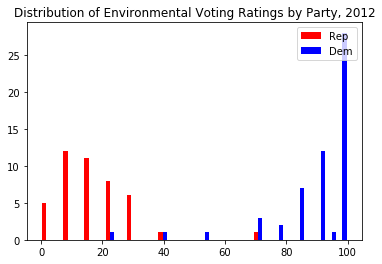

In [82]:
import numpy as np
import matplotlib.pyplot as plt
#plt.hist(X12_Rep, 20, density=True, facecolor='r', alpha=0.75)
#fig, ax = plt.subplots()
#ax.scatter(x, y, c=z, s=100, edgecolor='')
#pyplot.hist(x, bins, alpha=0.5, label='x')
#pyplot.hist(y, bins, alpha=0.5, label='y')
#pyplot.legend(loc='upper right')
#pyplot.show()
bins = np.linspace(0, 100, 30)
colors = ['r','b']
plt.hist([X12_Rep, X12_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2012')
plt.legend(loc='upper right')
plt.show()

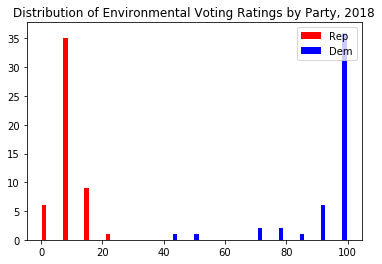

In [83]:
bins = np.linspace(0, 100, 30)
plt.hist([X18_Rep, X18_Dem], bins, color=colors, label=['Rep', 'Dem'])
plt.title('Distribution of Environmental Voting Ratings by Party, 2018')
plt.legend(loc='upper right')
plt.show()